<a href="https://colab.research.google.com/github/JoanYego/Real-Estate-Prediction-Model/blob/master/Real_Estate_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the Question

## Specifying the Goal of the Analysis

The goal of this analysis is to develop a prediction model that can be used to accurately predict the sale price of houses given various predictor variables. The model will be developed after studying several factors that affect housing prices in the real estate industry. 

## Defining the Metric for Success

This analysis will be considered a success when we are able to apply various regressions to the dataset in order to identify the best prediction model that has the highest accuracy level. The baseline model should be identified and compared to other regression models. The prediction model selected for this research question should not suffer from any instances of overfitting or underfitting.

## Understanding the Context

Real estate is an important economic sector around the world. As an investor in the real estate business, a company such as Hass Consulting, needs to be able to sell real estate properties at a price that is both profitable to them and attractive enough to the clients. While a low price might attract more customers, the company may experience low profit margin which can hinder growth. On the other hand, a high price may not bring in any customers therefore reducing the revenue stream. 

Proper valuation of real estate is not only important for private businesses but also financial institutions such as banks. This is because banks often offer loans and mortgages to home owners, business or investors. When financial institutions do not price real estate appropriately, the negative effects in the economy could be dire. This was well demonstarated in the housing bubble burst during the 2008 financial crisis.

Various factors affect the price of any real estate property. Some of these factors include the square footage, number of rooms, location, year of construction and the nature of views and amenities available in the locale. This analysis seeks to study some of the mentioned variables and train a regression model that can the be used to predict the price of a house. The models tested in this analysis include multiple linear regression, quantile regression, ridge regression, lasso regression and elastic net regression.


## Recording the Experimental Design

Below are the steps that will be conducted in this analysis in order to respond to the research question comprehensively:

>* Load data and preview preliminary characteristics
>* Data Cleaning (check for and deal with outliers, anomalies and missing data)
>* Exploratory Analysis
>* Implementing the Solution
>* Challenging the Solution
>* Follow Up Questions

## Data Relevance

The data available for this project was provided by Hass Consulting Company, which is a real estate leader with over 25 years of experience. The dataset contains information on real estate properties that was collected over the past few months.

Some of the attributes availbale in the dataset include price, number of bedrooms and bathrooms, condition, year built, zipcode among others.

# Importing Relevant Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Reading the Data

In [16]:
# loading the data from csv file

estate = pd.read_csv('house_data.csv')

estate

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0      7129300520  221900.0         3  ... -122.257           1340        5650
1      6414100192  538000.0         3  ... -122.319           1690        7639
2      5631500400  180000.0         2  ... -122.233           2720        8062
3      2487200875  604000.0         4  ... -122.393           1360        5000
4      1954400510  510000.0         3  ... -122.045           1800        7503
...           ...       ...       ...  ...      ...            ...         ...
21608   263000018  360000.0         3  ... -122.346           1530        1509
21609  6600060120  400000.0         4  ... -122.362           1830        7200
21610  1523300141  402101.0         2  ... -122.299           1020        2007
21611   291310100  400000.0         3  ... -122.069           1410        1287
21612  1523300157  325000.0         2  ... -122.299           1020        1357

[21613 rows x 20 columns]

# Checking the Data

In [17]:
# previewing a sample of the data

estate.sample(n=5)

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
7214   7139800020  369000.0         3  ... -122.286           1950        5195
6709   2545700020  458500.0         2  ... -122.298           1250        6828
13131  4178500580  339950.0         4  ... -122.089           1740        7150
5308   1862000010  915000.0         4  ... -122.113           2880        9705
14597  2525310220  242050.0         3  ... -122.031           1420       10614

[5 rows x 20 columns]

In [18]:
# previewing the top 5 records 

estate.head(5)

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639
2  5631500400  180000.0         2  ... -122.233           2720        8062
3  2487200875  604000.0         4  ... -122.393           1360        5000
4  1954400510  510000.0         3  ... -122.045           1800        7503

[5 rows x 20 columns]

In [19]:
# previewing the bottom 5 records

estate.tail(5)

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
21608   263000018  360000.0         3  ... -122.346           1530        1509
21609  6600060120  400000.0         4  ... -122.362           1830        7200
21610  1523300141  402101.0         2  ... -122.299           1020        2007
21611   291310100  400000.0         3  ... -122.069           1410        1287
21612  1523300157  325000.0         2  ... -122.299           1020        1357

[5 rows x 20 columns]

In [20]:
# checking the total number of records and columns

estate.shape

(21613, 20)

In [21]:
# checking datatypes of each attribute and previewing the existense of null values

estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

>* all columns have numeric datatypes and no missing values


# Data Cleaning

In [22]:
# confirm that there are no missing values

estate.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [23]:
# check for duplicate records

estate['id'].duplicated().any()

True

Since we have duplicate records, let's investigate further to see the nature of the duplicates in order to deal with them appropriately. We need the id column to be unique since each property should only exist once.

In [24]:
# display duplicate records

ids = estate["id"]
dups = estate[ids.isin(ids[ids.duplicated()])]
dups

id      price  bedrooms  ...     long  sqft_living15  sqft_lot15
93     6021501535   430000.0         3  ... -122.386           1570        4500
94     6021501535   700000.0         3  ... -122.386           1570        4500
313    4139480200  1380000.0         4  ... -122.102           3860       11244
314    4139480200  1400000.0         4  ... -122.102           3860       11244
324    7520000520   232000.0         2  ... -122.352           1820        7460
...           ...        ...       ...  ...      ...            ...         ...
20670  8564860270   502000.0         4  ... -121.734           2680        5992
20779  6300000226   240000.0         4  ... -122.342           1130        1598
20780  6300000226   380000.0         4  ... -122.342           1130        1598
21580  7853420110   594866.0         3  ... -121.886           2850        6000
21581  7853420110   625000.0         3  ... -121.886           2850        6000

[353 rows x 20 columns]

>* From the above result, we see that some property ids have been duplicated. For these duplicate records, the only different column is the price. A property can only have one sale price. Since we do not know what the correct sale price is, we can drop all the duplicate records.

In [25]:
# drop duplicate rows

estate = estate.drop(dups.index, axis=0) 

In [26]:
# confirm that 353 records have been removed

estate.shape

(21260, 20)

In [27]:
# confirm that there are no more duplicates

estate.duplicated().any()

False

Outliers

In [38]:
# plotting box plots to check for outliers

def plot_boxplots(dataframe,col_names):
    
    fig, ax = plt.subplots(len(col_names), figsize=(10,80))
    
    for i, column_name in enumerate(col_names):
        sns.boxplot(y=target_dataframe[column_name], ax=ax[i])
        ax[i].set_title('Box plot - {}'.format(column_name), fontsize=10)
        ax[i].set_xlabel(column_name, fontsize=8)
    
    plt.show()

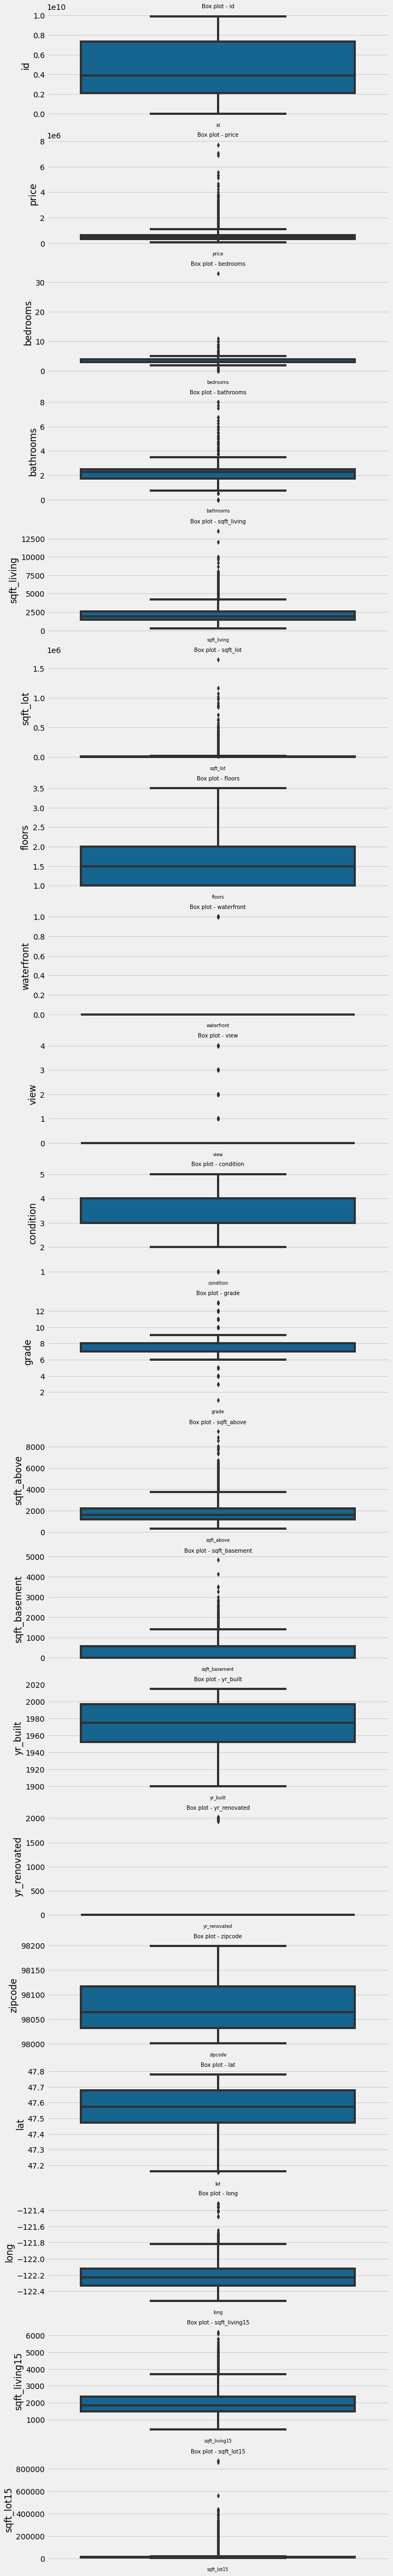

In [41]:
# executing the function above with applicable parameters

col_names = estate.columns
dataframe = estate

plt.style.use('tableau-colorblind10')
plot_boxplots(dataframe,col_names)

>* Most variables have some outliers. We shall only take note of this but still keep the outliers since they could be valid observations/records

In [42]:
# Check that year of renovation is greater than year of construction

estate[(estate.yr_built > estate.yr_renovated) & (estate.yr_renovated > 0)]

Empty DataFrame
Columns: [id, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

>* The code above returns an empty result set meaning there are no records where year of construction is later than year of renovation.

In [43]:
# Confirming that there are no missing values

estate.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Exploratory Data Analysis

## Univariate Analysis

In [44]:
# Frequency table for waterfront existence

estate.waterfront.value_counts()

0    21097
1      163
Name: waterfront, dtype: int64

In [45]:
# Frequency table for condition

estate.condition.value_counts()

3    13791
4     5611
5     1673
2      157
1       28
Name: condition, dtype: int64

In [46]:
# Frequency table for grade

estate.grade.value_counts()

7     8811
8     6020
9     2597
6     1952
10    1126
11     393
5      227
12      88
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [47]:
# Frequency table for number of bedrooms

print(estate.bedrooms.value_counts())

3     9639
4     6816
2     2712
5     1571
6      258
1      189
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64


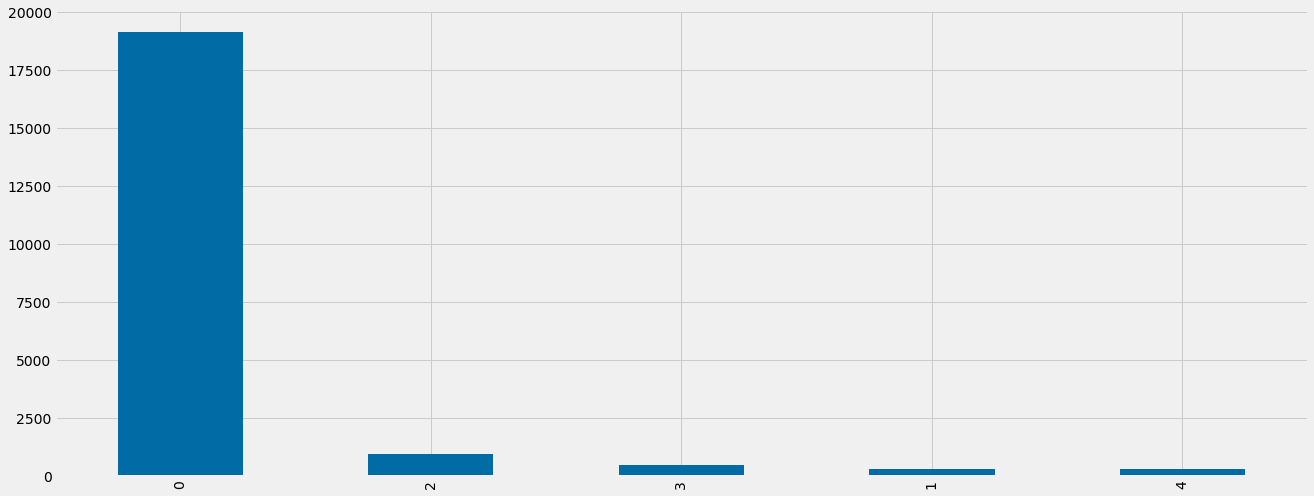

In [48]:
# Distribution of number of views

estate['view'].value_counts().plot.bar(figsize=(20,8))


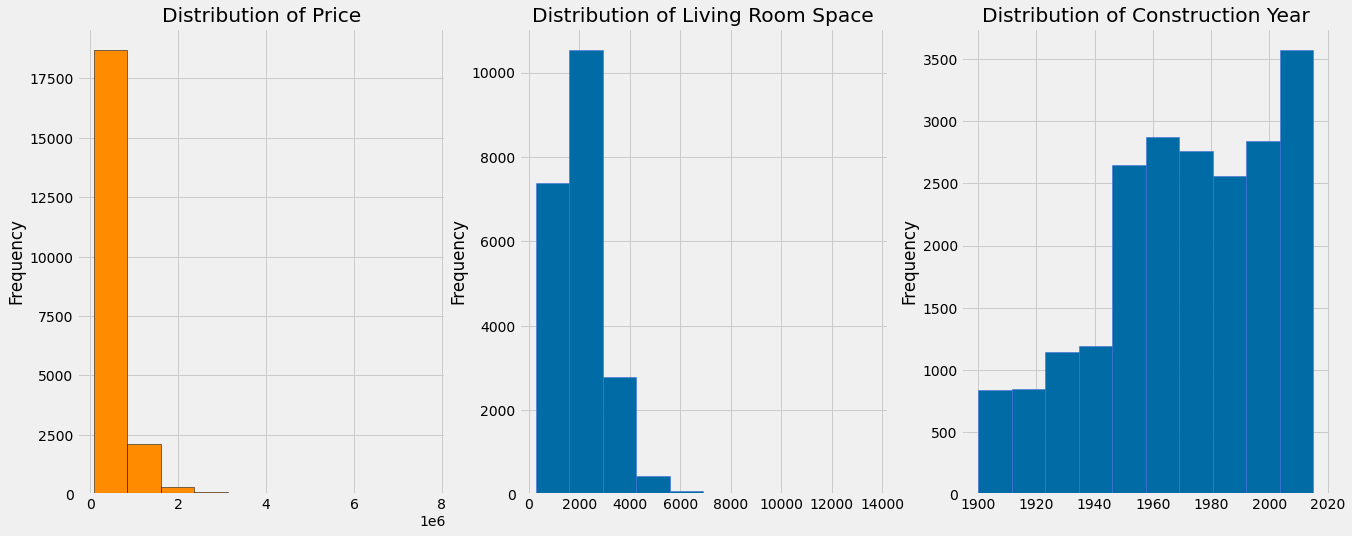

In [49]:
# histograms to show distribution of price, living room space and year of construction

fig, ax=plt.subplots(1,3, figsize=(20,8))
estate['price'].plot.hist(ax=ax[0], bins=10, edgecolor='black', color='darkorange')
ax[0].set_title('Distribution of Price')
estate['sqft_living'].plot.hist(ax=ax[1], bins=10, edgecolor='royalblue')
ax[1].set_title('Distribution of Living Room Space')
estate['yr_built'].plot.hist(ax=ax[2], bins=10, edgecolor='royalblue')
ax[2].set_title('Distribution of Construction Year')

plt.show()

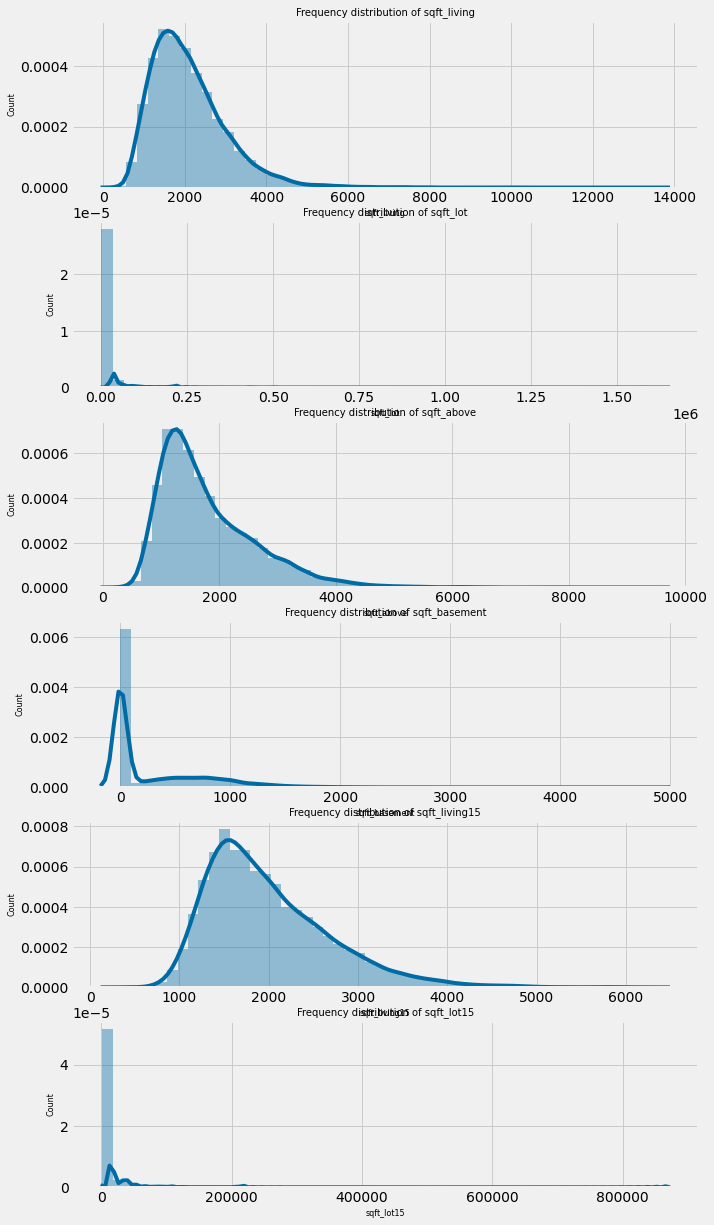

In [50]:
# Frequency distribution plots

col_names = ['sqft_living','sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
fig, ax = plt.subplots(len(col_names), figsize=(10,20))

for i, col_val in enumerate(col_names):

    sns.distplot(estate[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

Measures of Central Tendencies

In [51]:
# mean, mode and median of prices

print('Mean price is ' + str(estate.price.mean()))
print('Median price is ' + str(estate.price.median()))
print('Mode price is ' + str(estate.price.mode()))

Mean price is 542183.3717309502
Median price is 451000.0
Mode price is 0    450000.0
dtype: float64


In [52]:
# mean, mode and median of bedrooms

print('Mean number of bedrooms is ' + str(estate.bedrooms.mean()))
print('Median number of bedrooms is ' + str(estate.bedrooms.median()))
print('Mode number of bedrooms is ' + str(estate.bedrooms.mode()))

Mean number of bedrooms is 3.3722953904045156
Median number of bedrooms is 3.0
Mode number of bedrooms is 0    3
dtype: int64


In [53]:
# mean, mode and median of bathrooms

print('Mean number of bathrooms is ' + str(estate.bathrooms.mean()))
print('Median number of bathrooms is ' + str(estate.bathrooms.median()))
print('Mode number of bathrooms is ' + str(estate.bathrooms.mode()))

Mean number of bathrooms is 2.119931796801505
Median number of bathrooms is 2.25
Mode number of bathrooms is 0    2.5
dtype: float64


Measures of Dispersion

In [54]:
# summary of standard deviation, range, and interquatile range

estate.describe()

id         price  ...  sqft_living15     sqft_lot15
count  2.126000e+04  2.126000e+04  ...   21260.000000   21260.000000
mean   4.581059e+09  5.421834e+05  ...    1990.062324   12803.450141
std    2.876664e+09  3.681205e+05  ...     686.020116   27447.132427
min    1.200019e+06  7.500000e+04  ...     399.000000     651.000000
25%    2.124064e+09  3.249500e+05  ...    1490.000000    5100.000000
50%    3.904921e+09  4.510000e+05  ...    1840.000000    7620.000000
75%    7.308600e+09  6.468500e+05  ...    2370.000000   10090.250000
max    9.900000e+09  7.700000e+06  ...    6210.000000  871200.000000

[8 rows x 20 columns]

## Bivariate Analysis

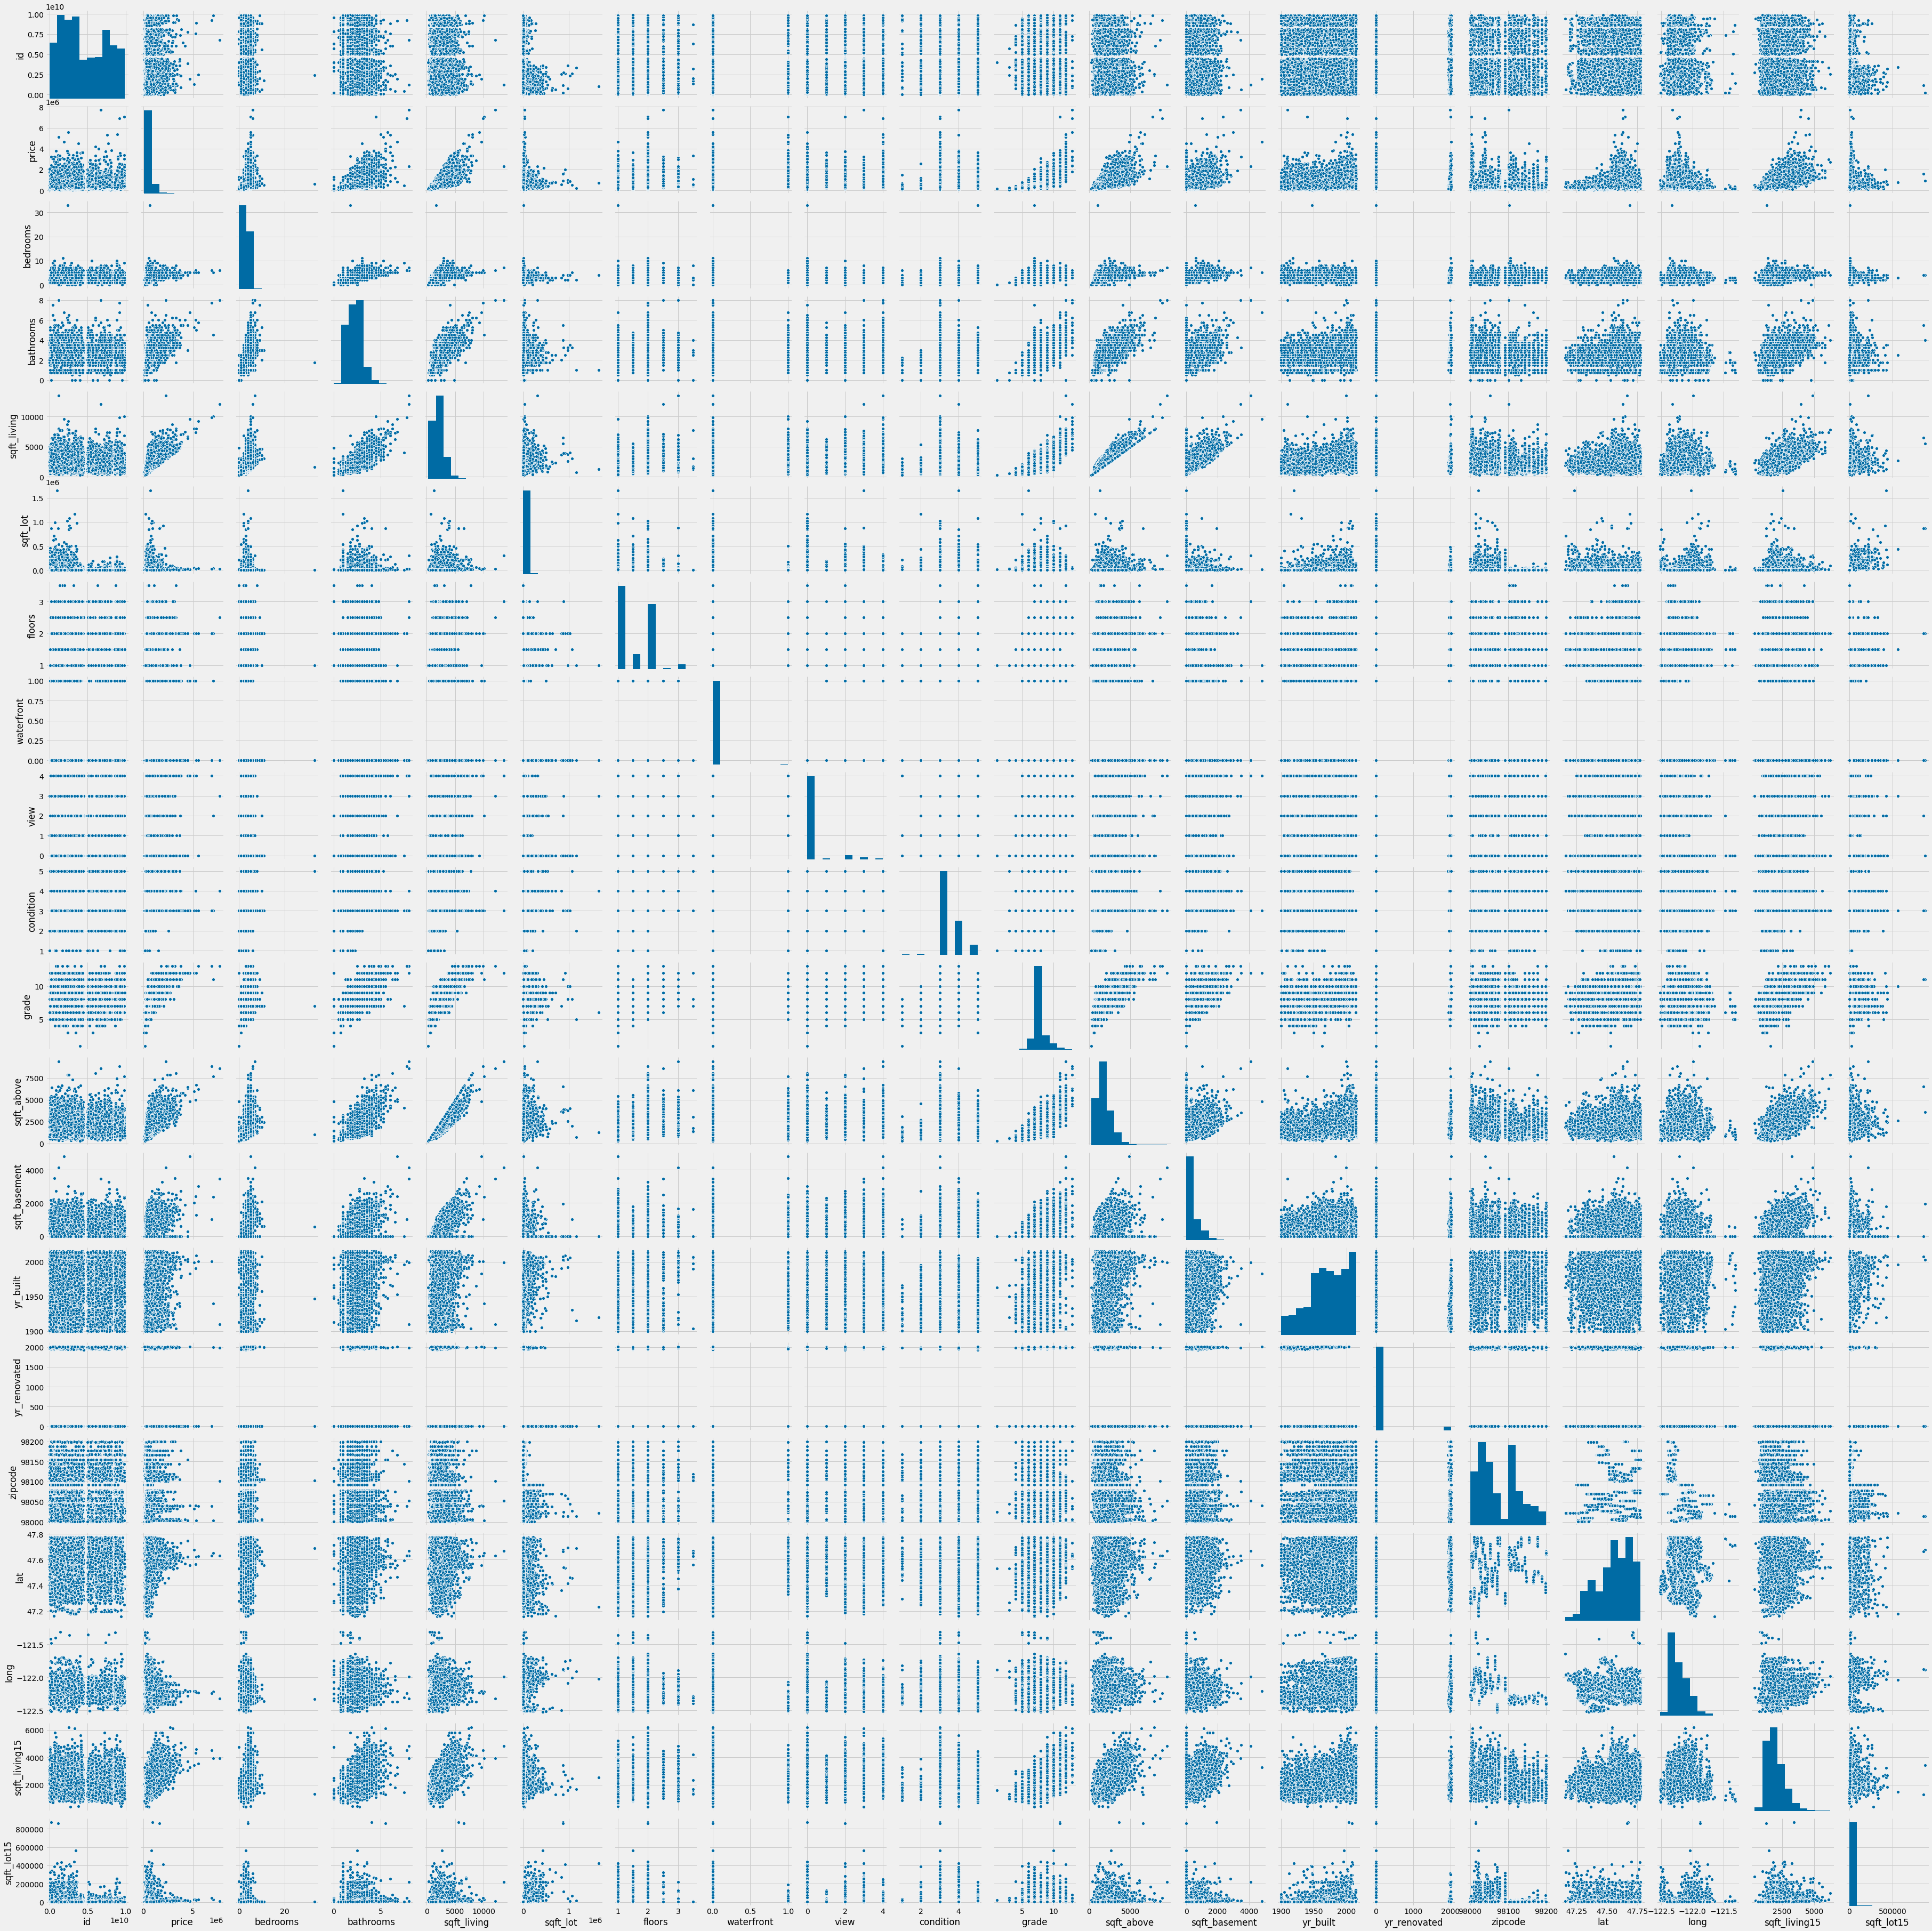

In [55]:
# Ploting the bivariate summaries and recording observations

sns.pairplot(estate)
plt.show()

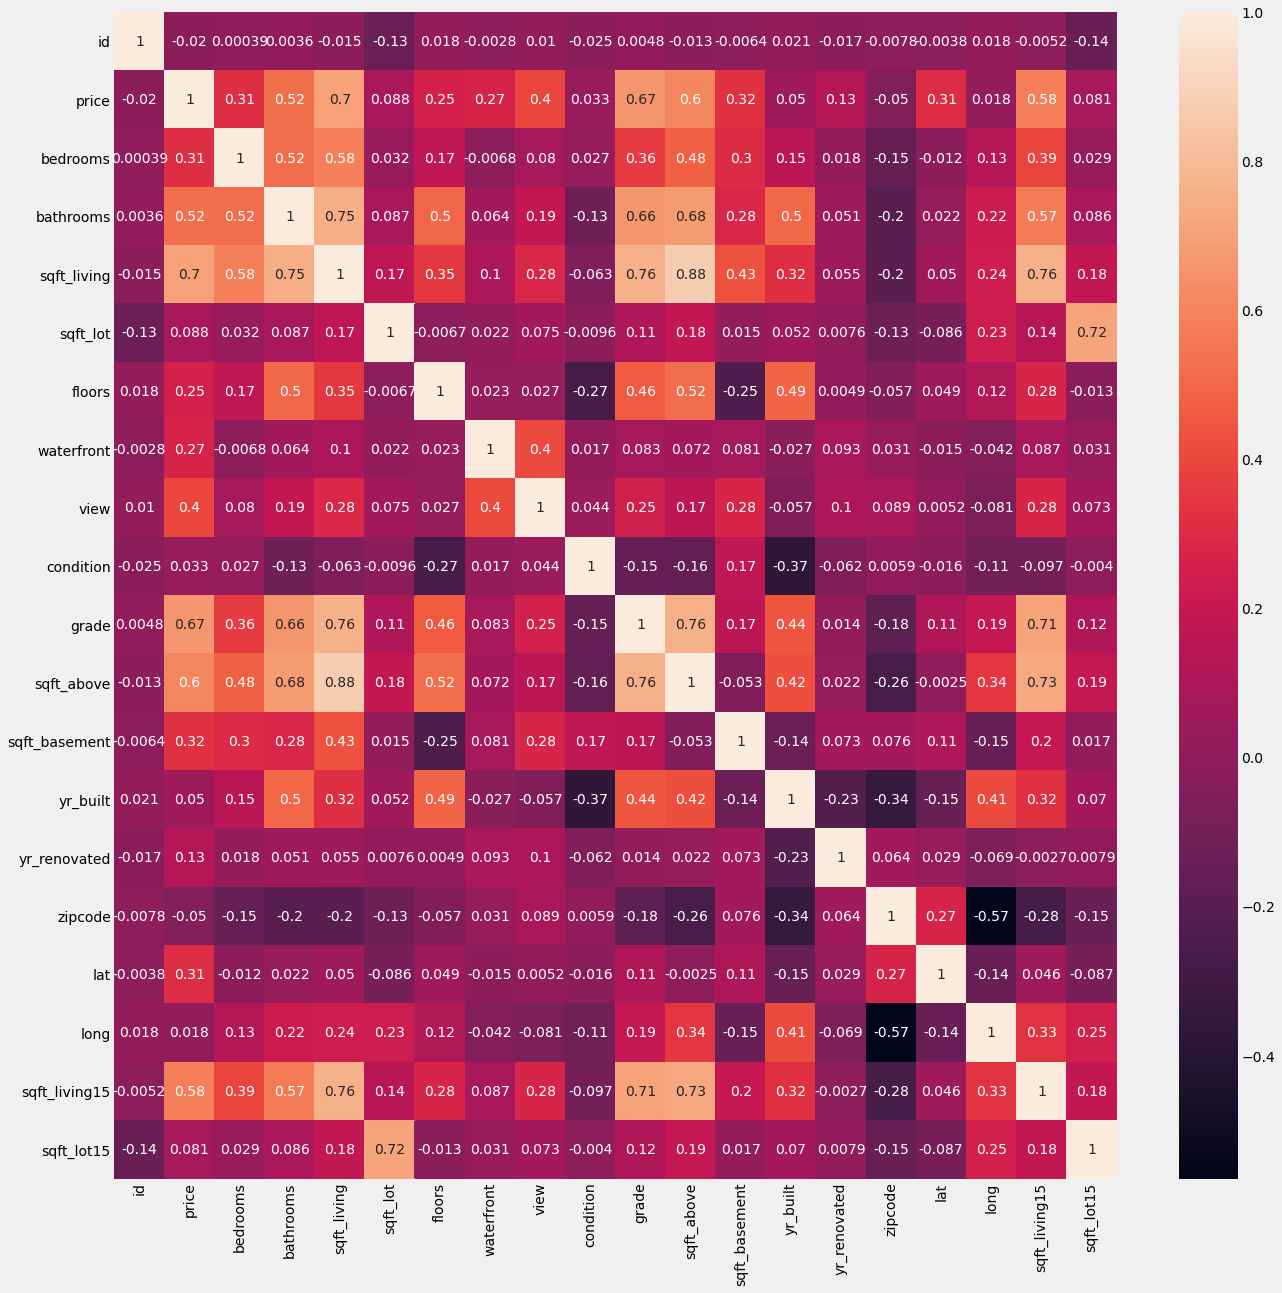

In [56]:
# Plotting the Pearson correlation coefficient among variables
plt.figure(figsize=(20, 20))
sns.heatmap(estate.corr(),annot=True)
plt.show()

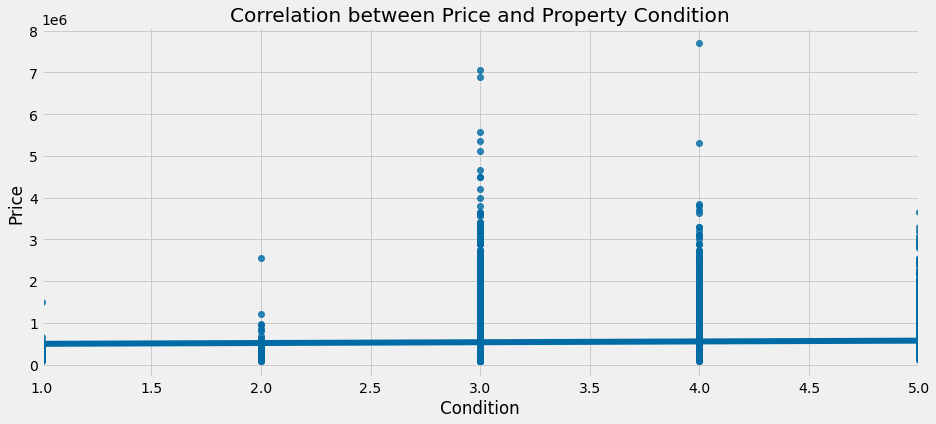

In [57]:
# scatter plot to check correlation of house condition and price

plt.figure(figsize = (14,6))
sns.regplot(estate['condition'],estate['price'])
plt.ylabel('Price')
plt.xlabel('Condition')
plt.title('Correlation between Price and Property Condition')
plt.show()

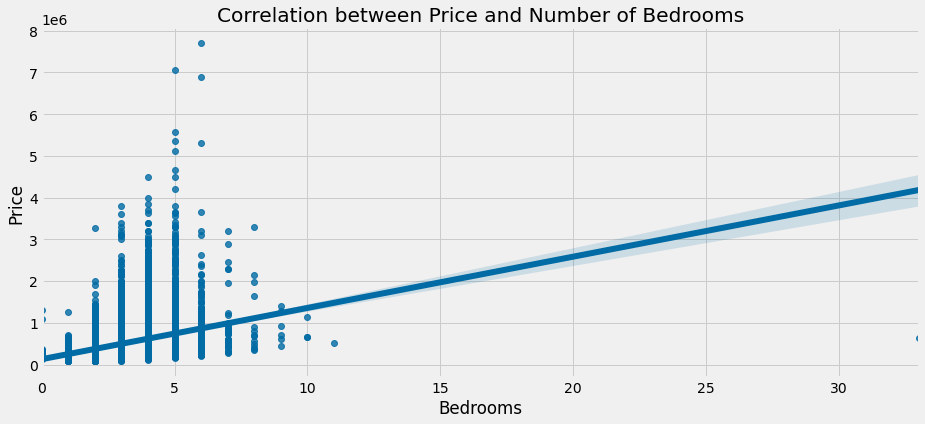

In [58]:
# scatter plot to check correlation of number of bedrooms and price

plt.figure(figsize = (14,6))
sns.regplot(estate['bedrooms'],estate['price'])
plt.ylabel('Price')
plt.xlabel('Bedrooms')
plt.title('Correlation between Price and Number of Bedrooms')
plt.show()

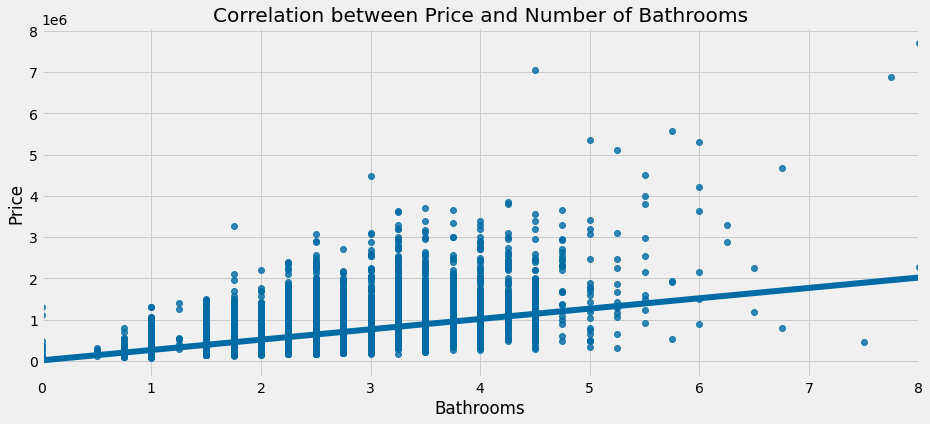

In [59]:
# scatter plot to check correlation of number of bathrooms and price

plt.figure(figsize = (14,6))
sns.regplot(estate['bathrooms'],estate['price'])
plt.ylabel('Price')
plt.xlabel('Bathrooms')
plt.title('Correlation between Price and Number of Bathrooms')
plt.show()

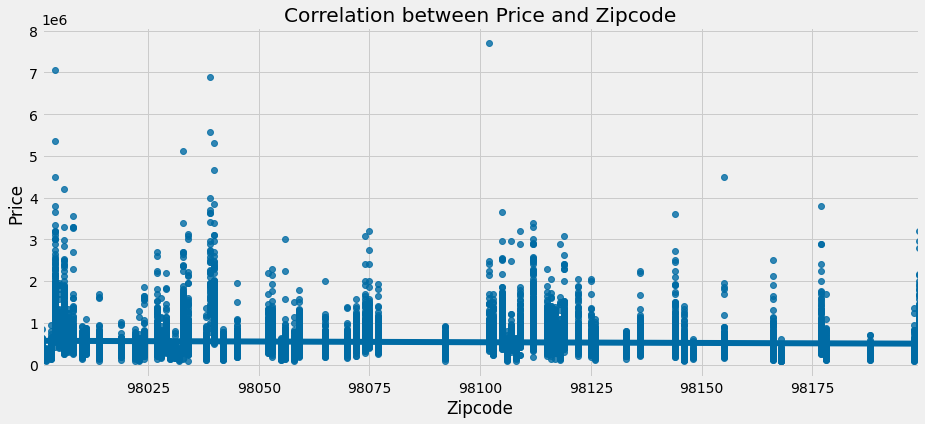

In [60]:
# scatter plot to check correlation of zipcode and price

plt.figure(figsize = (14,6))
sns.regplot(estate['zipcode'],estate['price'])
plt.ylabel('Price')
plt.xlabel('Zipcode')
plt.title('Correlation between Price and Zipcode')
plt.show()

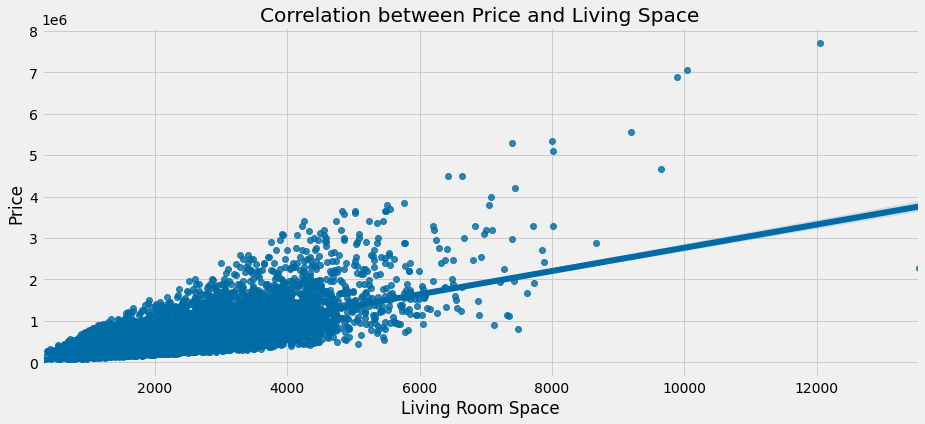

In [61]:
# scatter plot to check correlation of living room space and price

plt.figure(figsize = (14,6))
sns.regplot(estate['sqft_living'],estate['price'])
plt.ylabel('Price')
plt.xlabel('Living Room Space')
plt.title('Correlation between Price and Living Space')
plt.show()

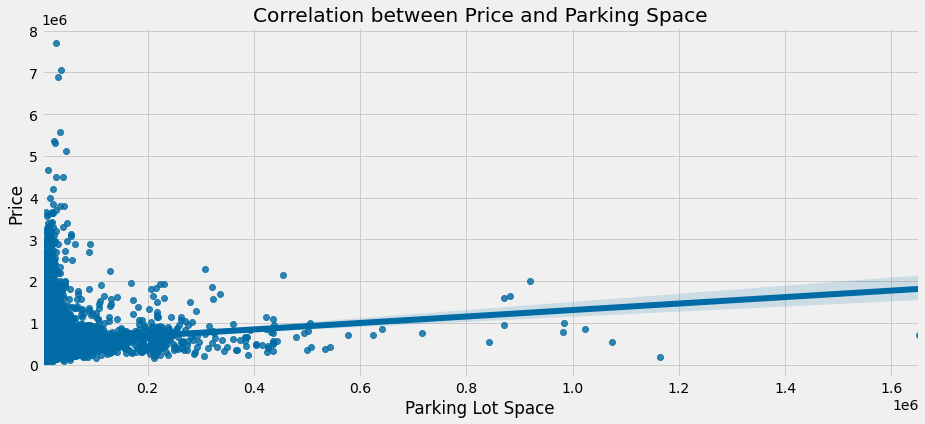

In [62]:
# scatter plot to check correlation of parking lot space and price

plt.figure(figsize = (14,6))
sns.regplot(estate['sqft_lot'],estate['price'])
plt.ylabel('Price')
plt.xlabel('Parking Lot Space')
plt.title('Correlation between Price and Parking Space')
plt.show()

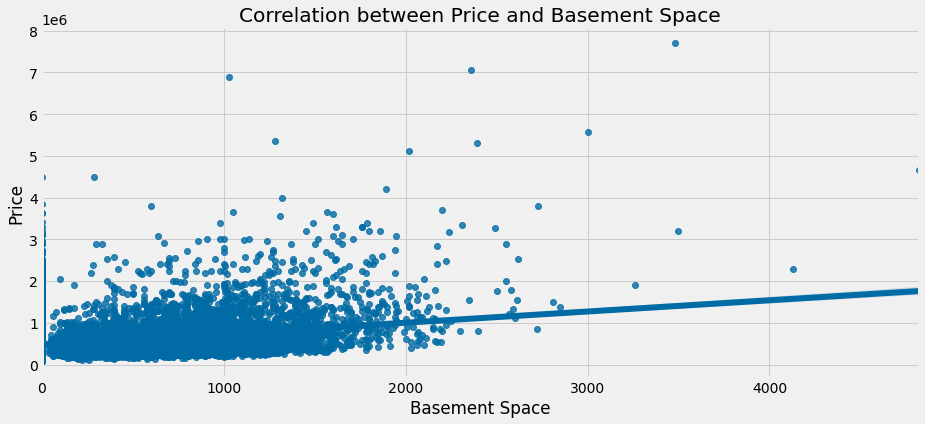

In [63]:
# scatter plot to check correlation of basement space and price

plt.figure(figsize = (14,6))
sns.regplot(estate['sqft_basement'],estate['price'])
plt.ylabel('Price')
plt.xlabel('Basement Space')
plt.title('Correlation between Price and Basement Space')
plt.show()

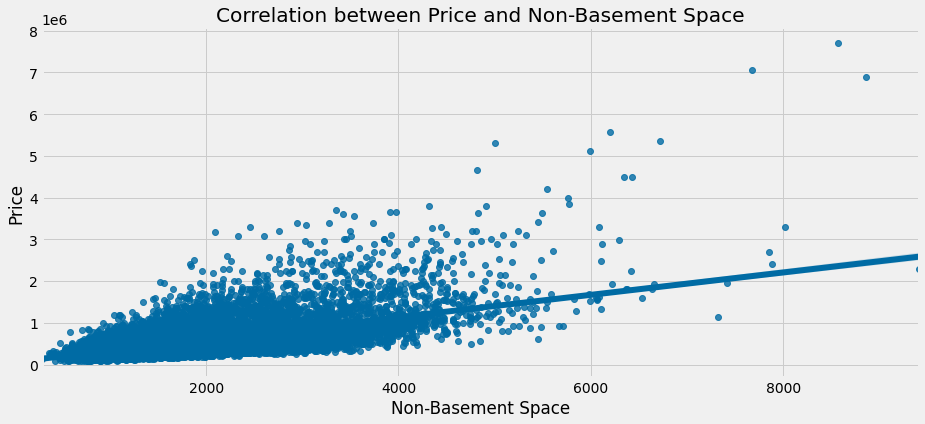

In [64]:
# scatter plot to check correlation of non-basement space and price

plt.figure(figsize = (14,6))
sns.regplot(estate['sqft_above'],estate['price'])
plt.ylabel('Price')
plt.xlabel('Non-Basement Space')
plt.title('Correlation between Price and Non-Basement Space')
plt.show()

## Multivariate Analysis

Principle Component Analysis (PCA)

In [65]:
# defining the features and target variable

x = estate.drop(['price','id'],1)
y = estate['price']

# splitting the data into training and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# normalize feature set

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# applying PCA

pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

# checking the variance explained by each principal component

explained_variance = pca.explained_variance_ratio_
explained_variance


array([2.91424030e-01, 1.22285973e-01, 1.02253866e-01, 7.56135086e-02,
       6.75335411e-02, 5.60296879e-02, 4.85221131e-02, 4.67420302e-02,
       3.60906107e-02, 3.29349843e-02, 2.75106195e-02, 2.24415031e-02,
       1.79247981e-02, 1.56577539e-02, 1.40507949e-02, 1.25281628e-02,
       1.04560220e-02, 7.99875601e-34])

>* The results above show that the first three components explain 29% , 12% and 10% (respectively) of the variance in the dataset.

In [66]:
# using PCA to train algorithm

pca = PCA(n_components=1)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

# making predictions using random forest classifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)

# Predicting the Test set results

y_pred = classifier.predict(x_test)

# evaluating the model with only one principal component
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.007525870178739417


>* With only one feature, the random forest algorithm is able to correctly predict with an accuracy of 0.7% which is extremely lower and quite insignificant.

Factor Analysis

In [67]:
# evaluating the “factorability” of our dataset

!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(estate)
chi_square_value, p_value

(853794.2073519282, 0.0)

>* In Bartlett ’s test, the p-value is 0. The test was statistically insignificant, indicating that the observed correlation matrix is not an identity matrix.

In [68]:
# checking the Kaiser-Meyer-Olkin (KMO) Test

from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(estate)

kmo_model


/usr/local/lib/python3.6/dist-packages/factor_analyzer/factor_analyzer.py:50: RuntimeWarning: invalid value encountered in sqrt
  Is = np.sqrt(1 / np.diag(m))


nan

>* The overall KMO for our data is inadequate indicating that we cannot proceed with the planned factor analysis.

# Implementing the Solution

## Feature Engineering

In [69]:
# dropping the id column

estate = estate.drop(columns='id')

>* For purposes of this analysis, we will assume that a renovated property is as good as new.

In [70]:
# create a new column showing the age of the house

conditions = [estate['yr_renovated'] == 0,
              estate['yr_renovated'] != 0]

# create a list of the values to assign each condition
age1 = 2020 - estate['yr_built']
age2 = 2020 - estate['yr_renovated']

values = [age1, age2]

# creating a new columnn status column using the conditions and values above

estate['age'] = np.select(conditions, values)
estate


price  bedrooms  bathrooms  ...  sqft_living15  sqft_lot15  age
0      221900.0         3       1.00  ...           1340        5650   65
1      538000.0         3       2.25  ...           1690        7639   29
2      180000.0         2       1.00  ...           2720        8062   87
3      604000.0         4       3.00  ...           1360        5000   55
4      510000.0         3       2.00  ...           1800        7503   33
...         ...       ...        ...  ...            ...         ...  ...
21608  360000.0         3       2.50  ...           1530        1509   11
21609  400000.0         4       2.50  ...           1830        7200    6
21610  402101.0         2       0.75  ...           1020        2007   11
21611  400000.0         3       2.50  ...           1410        1287   16
21612  325000.0         2       0.75  ...           1020        1357   12

[21260 rows x 20 columns]

In [71]:
# dropping the construction and renovation year

estate = estate. drop(columns=['yr_built', 'yr_renovated'])

In [72]:
# encoding the zipcode variable

# import labelencoder
from sklearn.preprocessing import LabelEncoder

# apply label encoder to appropriate column

le = LabelEncoder()
estate['zipcode'] = le.fit_transform(estate['zipcode'])

estate.head()

price  bedrooms  bathrooms  ...  sqft_living15  sqft_lot15  age
0  221900.0         3       1.00  ...           1340        5650   65
1  538000.0         3       2.25  ...           1690        7639   29
2  180000.0         2       1.00  ...           2720        8062   87
3  604000.0         4       3.00  ...           1360        5000   55
4  510000.0         3       2.00  ...           1800        7503   33

[5 rows x 18 columns]

>* since the zipcode tells us the general location of a real estate property, we can drop the latitude and longitude

In [73]:
# dropping the latitude and longitude

estate = estate.drop(columns=['lat', 'long'])
estate.head()

price  bedrooms  bathrooms  ...  sqft_living15  sqft_lot15  age
0  221900.0         3       1.00  ...           1340        5650   65
1  538000.0         3       2.25  ...           1690        7639   29
2  180000.0         2       1.00  ...           2720        8062   87
3  604000.0         4       3.00  ...           1360        5000   55
4  510000.0         3       2.00  ...           1800        7503   33

[5 rows x 16 columns]

In [74]:
# dropping sqft_above and sqft_basement since they add up to sqft_living

estate = estate.drop(columns=['sqft_above', 'sqft_basement'])
estate.head()

price  bedrooms  bathrooms  ...  sqft_living15  sqft_lot15  age
0  221900.0         3       1.00  ...           1340        5650   65
1  538000.0         3       2.25  ...           1690        7639   29
2  180000.0         2       1.00  ...           2720        8062   87
3  604000.0         4       3.00  ...           1360        5000   55
4  510000.0         3       2.00  ...           1800        7503   33

[5 rows x 14 columns]

Checking for multicollinearity

In [75]:
# Remove the dependent column so as to focus on independent variables only.

independent_only = estate.drop(columns=['price'])

# Display the correlations between the independent variables

correlations = independent_only.corr()

correlations

bedrooms  bathrooms  ...  sqft_lot15       age
bedrooms       1.000000   0.517678  ...    0.028991 -0.164476
bathrooms      0.517678   1.000000  ...    0.086081 -0.535805
sqft_living    0.578373   0.754187  ...    0.182266 -0.340672
sqft_lot       0.031738   0.086547  ...    0.717635 -0.051580
floors         0.174991   0.499077  ...   -0.012566 -0.504637
waterfront    -0.006787   0.063725  ...    0.030686  0.001179
view           0.079556   0.185623  ...    0.073164  0.021844
condition      0.027345  -0.130592  ...   -0.004037  0.404295
grade          0.359853   0.664500  ...    0.117375 -0.457554
zipcode       -0.153929  -0.190917  ...   -0.144523  0.298769
sqft_living15  0.394718   0.567780  ...    0.181688 -0.321117
sqft_lot15     0.028991   0.086081  ...    1.000000 -0.068876
age           -0.164476  -0.535805  ...   -0.068876  1.000000

[13 rows x 13 columns]

In [76]:
# Use calculated correlations to compute the VIF score for each variable

pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

bedrooms  bathrooms  ...  sqft_lot15       age
bedrooms       1.654783  -0.467502  ...    0.089133 -0.127738
bathrooms     -0.467502   3.269139  ...    0.091904  0.885930
sqft_living   -0.978872  -1.674218  ...   -0.187698 -0.435652
sqft_lot       0.047059  -0.001271  ...   -1.469935 -0.044560
floors         0.057176  -0.497565  ...    0.057901  0.431118
waterfront     0.064566   0.016935  ...   -0.018398  0.019385
view           0.105743  -0.094337  ...    0.005964 -0.137307
condition     -0.055021  -0.173206  ...   -0.026150 -0.568411
grade          0.312217  -0.234794  ...    0.104689  0.429668
zipcode        0.090180  -0.025475  ...    0.066751 -0.460644
sqft_living15  0.033826   0.168599  ...   -0.168431 -0.029234
sqft_lot15     0.089133   0.091904  ...    2.113037  0.083233
age           -0.127738   0.885930  ...    0.083233  2.083871

[13 rows x 13 columns]

>* The VIF score is found along the diagonal from top left to bottom right. Since all the VIF scores are below 5, we can say that there is no multicollinearity thus no alarming correlation between the independent variables.

## Multiple Linear Regression

>* This prediction model will be the baseline model for the research question. This is because we will not introduce any bias in search of variance reduction in the multiple linear regression. The model is also simple enough and applies very few assumptions. We shall then compare its prediction accuracy and performance with other regression models.

In [80]:
# Defining the features and target variable
X = estate[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 
        'zipcode', 'sqft_living15', 'sqft_lot15', 'age']]
y = estate['price']

# Dividing the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the Algorithm

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
# Checking coefficients chosen by the regression model 

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df


Coefficient
bedrooms       -38452.402893
bathrooms       45882.152002
sqft_living       166.712185
sqft_lot           -0.004068
floors          14200.072011
waterfront     598383.314670
view            48116.501026
condition       20817.595906
grade          118360.657775
zipcode           388.932799
sqft_living15      18.771138
sqft_lot15         -0.578656
age              3146.833249

In [82]:
# Making Predictions

y_pred = regressor.predict(X_test)

# Comparing actual output values for X_test with the predicted values

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

Actual      Predicted
12987   324950.0  261548.802729
6863    461000.0  343103.668843
19684  2210000.0  945854.185645
6185    287000.0  418335.707997
2889    635000.0  591719.204598
...          ...            ...
14016   255000.0  280266.137139
13306   395000.0  377661.346072
1360    815000.0  964819.197015
16730   209950.0  255400.626600
19778   445000.0  412420.985752

[4252 rows x 2 columns]

In [83]:
# Evaluating the Model

print('Mean Price: ', estate.price.mean())
print("Linear Regression R2 score is ",metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Price:  542183.3717309502
Linear Regression R2 score is  0.6255774238505589
Mean Absolute Error: 139795.19355680677
Mean Squared Error: 49349324123.15413
Root Mean Squared Error: 222147.07768312894


>* The RMSE score is much greater than 10% of the mean value of the prices which could imply that our algorithm is not very accurate. The R2 score of the model is 62.56% which is relatively low. However, we need to check the residuals to confirm this further.

Residuals and Heteroskedasticity Testing

In [84]:
# Create the residuals

residuals = np.subtract(y_pred, y_test)

# Describe the residuals

pd.DataFrame(residuals).describe()

price
count  4.252000e+03
mean  -5.491715e+02
std    2.221725e+05
min   -4.542832e+06
25%   -8.791063e+04
50%    1.558032e+04
75%    1.130613e+05
max    9.009142e+05

>* The mean of the residuals is close to 0, indicating that the model tends to be fairly correct, although slightly under estimating prices by, on average, 5.49%

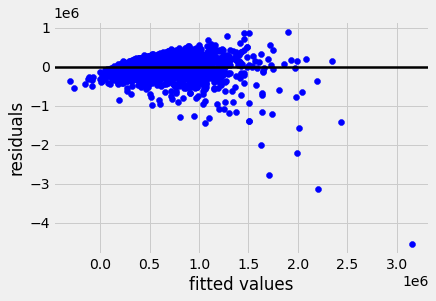

In [85]:
# plotting the residuals

plt.scatter(y_pred, residuals, color='blue')
plt.ylabel('residuals')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='black', linewidth=2.5)
plt.show()

In [86]:
# Heteroskedasticity test using bartlett's test

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# Computing a critical value of the chi squared distribution

degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print('Critical Value:', critical_value)
print('Test Statistic:', test_result)

if (test_result > critical_value):
  print('The variances are unequal, and the model should be reassessed')
else:
  print('The variances are homogeneous!')

Critical Value: inf
Test Statistic: 282.3279366138705
The variances are homogeneous!


>* An infinite critical value in the context of a heteroskedasticity test means that there might be multiple cut off points and many critical values. However, this is not problematic for the analysis since the variances are homogeneous.

## Quantile Regression

>* Since our data has some outliers and a relatively high skewness for the dependent variable, we can use quantile regression to get a more comprehensive picture of the effect of the independent variables on the dependent variable. Here, we will model the relationship between price and the conditional quantiles of all the independent variables.


In [87]:
import statsmodels.formula.api as smf

# Defining the quantiles

quantiles = [0.25,0.5,0.75]

# Finding the regression coefficients for the quantiles

for i in quantiles:
  mod = smf.quantreg('y ~ X', estate)
  res = mod.fit(i)
  
  # Summary of the model
  print(res.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3123
Model:                       QuantReg   Bandwidth:                   2.183e+04
Method:                 Least Squares   Sparsity:                    3.648e+05
Date:                Sun, 27 Sep 2020   No. Observations:                21260
Time:                        06:13:00   Df Residuals:                    21246
                                        Df Model:                           13
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.444e+05   1.21e+04    -53.135      0.000   -6.68e+05   -6.21e+05
X[0]       -2.848e+04   1458.057    -19.535      0.000   -3.13e+04   -2.56e+04
X[1]        2.062e+04   2529.621      8.150      0.000    1.57e+04    2.56e+04
X[2]          93.1546      2.611     35.675      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3820
Model:                       QuantReg   Bandwidth:                   2.446e+04
Method:                 Least Squares   Sparsity:                    3.490e+05
Date:                Sun, 27 Sep 2020   No. Observations:                21260
Time:                        06:13:05   Df Residuals:                    21246
                                        Df Model:                           13
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -8.49e+05   1.43e+04    -59.551      0.000   -8.77e+05   -8.21e+05
X[0]       -2.743e+04   1658.253    -16.544      0.000   -3.07e+04   -2.42e+04
X[1]        3.299e+04   2811.171     11.735      0.000    2.75e+04    3.85e+04
X[2]         105.4166      2.895     36.413      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


>* The prediction in the quantile regression is relatively poor as shown in the Pseudo R-squared values which is as low as 0.31 for the 25 percentile and as high as 0.45 for the 75 percentile. The model explains less than 0.5 of the variability in the data at best. An issue of multicollinearity could be the problem in which case we need to explore other regression models that perform regularization.

In [405]:
# Checking other quantiles

quantiles = np.arange(0.1,1,0.1)

# Finding the regression coefficients for the quantiles

for i in quantiles:
  mod = smf.quantreg('y ~ X', estate)
  res = mod.fit(i)
  
  # Summary of the model
  print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2570
Model:                       QuantReg   Bandwidth:                   2.382e+04
Method:                 Least Squares   Sparsity:                    4.572e+05
Date:                Sat, 26 Sep 2020   No. Observations:                21260
Time:                        20:21:43   Df Residuals:                    21246
                                        Df Model:                           13
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.832e+05   1.02e+04    -37.550      0.000   -4.03e+05   -3.63e+05
X[0]       -1.456e+04   1267.211    -11.491      0.000    -1.7e+04   -1.21e+04
X[1]        2.246e+04   2151.369     10.441      0.000    1.82e+04    2.67e+04
X[2]          60.5183      2.204     27.461      0.0

>* Breaking up the quantiles further improves the prediction slightly. The model still predicts the lower quantiles poorly relative to higher quantiles. 

## Ridge Regression

>* Implementing L2 regularization method to help deal with multicollinearity in the data.

In [88]:
# create ridge model and indicate normalization 
 
ridge = Ridge(normalize=True)

# setup the grid to use

search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

# run the model and determine the model's strength  

search.fit(X_train,y_train)
print(search.best_params_)

print(abs(search.best_score_))

{'alpha': 0.001}
49142387170.49246


>* The best_score_ tells us what the best possible mean squared error is. In this case, the value MSE is better than what the baseline model was.



In [89]:
# fit the model with the alpha value above and find the metrics 

ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X_train,y_train)
y_pred_ridge=ridge.predict(X_test)

print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,y_pred_ridge))
print("Ridge Regression R2 score is ",metrics.r2_score(y_test, y_pred_ridge))
print("Mean Squared Error:", metrics.mean_squared_error(y_test,y_pred_ridge))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)))

Mean Absolute Error: 139753.22251829924
Ridge Regression R2 score is  0.6255601781622234
Mean Squared Error: 49351597124.61721
Root Mean Squared Error: 222152.19360748434


In [90]:
# Checking the coefficient values

coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,X.columns):
    coef_dict_baseline[feat] = coef

# comparing with the coefficients from the baseline model
print('    Linear Coefficients')
print(coeff_df)
print('>>>>>>>>>>>>>>>>>>')
print('    Ridge Coefficients')
coef_dict_baseline

    Linear Coefficients
                 Coefficient
bedrooms       -38452.402893
bathrooms       45882.152002
sqft_living       166.712185
sqft_lot           -0.004068
floors          14200.072011
waterfront     598383.314670
view            48116.501026
condition       20817.595906
grade          118360.657775
zipcode           388.932799
sqft_living15      18.771138
sqft_lot15         -0.578656
age              3146.833249
>>>>>>>>>>>>>>>>>>
    Ridge Coefficients


{'age': 3139.7312482337047,
 'bathrooms': 45996.43454683844,
 'bedrooms': -38253.48423842986,
 'condition': 20887.164728185857,
 'floors': 14215.391562378361,
 'grade': 118171.27071219812,
 'sqft_living': 166.2010270829303,
 'sqft_living15': 19.22535215979663,
 'sqft_lot': -0.003820597873022918,
 'sqft_lot15': -0.5769444471144922,
 'view': 48178.852818797095,
 'waterfront': 597909.6807538297,
 'zipcode': 391.9759774094524}

>* The coefficient values have not changed much meaning that the penalization made little difference with this dataset. The R2 score of the model is still 62.55%.

## Lasso Regression

Implementing L1 regularization method to help deal with multicollinearity in the data.

In [91]:
# Testing the lasso model on the whole dataset

from sklearn.metrics import mean_squared_error

# Creating lasso object

lasso = linear_model.Lasso() 

# Fitting the models

lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.6385930527876542
lasso MSE: 48972935559.101974
lasso coef: [-3.93856585e+04  4.35826762e+04  1.72692939e+02 -1.18584503e-02
  1.65081427e+04  5.94071814e+05  4.95095771e+04  2.00210328e+04
  1.15667292e+05  3.29075176e+02  1.51054121e+01 -5.63714090e-01
  3.09771272e+03]


In [93]:
# Splitting the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# Choosing the regularization parameter  

parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients

gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("Lasso Regression R2 score is ",metrics.r2_score(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 24.0}
lasso MSE: 51179027280.36489
Lasso Regression R2 score is  0.63828609486767
linear MSE: 51172478879.00739
lasso best estimator coef: [-4.48522392e+04  4.00621025e+04  1.77787661e+02 -3.38649601e-02
  1.29380354e+04  5.58127196e+05  5.15834314e+04  1.98390756e+04
  1.14611341e+05  2.52971715e+02  1.56601127e+01 -6.50404333e-01
  3.04472367e+03]
linear coef: [-4.48911209e+04  4.01765598e+04  1.77699828e+02 -3.38110834e-02
  1.30211422e+04  5.61867482e+05  5.14561381e+04  1.99041096e+04
  1.14642662e+05  2.52589967e+02  1.56648248e+01 -6.50271421e-01
  3.04621673e+03]


>* The penalization effect on the coefficients is slightly improve when using L1 regularization. The R2 score of 63.83% is also a slight improvement compared to the baseline model.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 385014593688390.6, tolerance: 212882068187.22168
  positive)


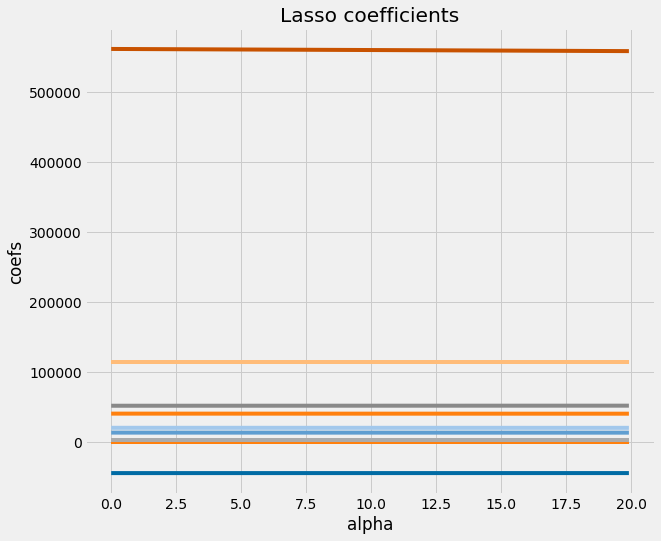

In [94]:
# Visualizing results

coefsLasso = [] 

alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots

plt.figure(figsize = (20,8))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()



>* Lasso regression influences less on the large coefficients, but reduces the small ones to zeroes. This allows us to determine which features are important to us and keeps the features that may influence the target variable.

## Elastic Net Regression

>* Combining L1 and L2 regularization methods.

In [95]:
# We shall you use the features and target variable defined previously

from sklearn.linear_model import ElasticNet

# Defining data normalization using the ElasticNet function

elastic=ElasticNet(normalize=True)

# Creating the grid

search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [96]:
# Fit the model and display the best parameters and associated results

search.fit(X,y)
print(search.best_params_)
print(abs(search.best_score_))

{'alpha': 1e-05, 'l1_ratio': 0.8}
49541624538.932556


In [102]:
#  setting the hyperparameters to the recommended values 

elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
elastic.fit(X_train,y_train)
y_pred=elastic.predict(X_test)

#elastic_meanAbsError=mean_absolute_error(y_test,y_pred)
#elastic_meanSqrdError=round(mean_squared_error(np.array(y_test),y_pred),2)
#elastic_rootMeanSqrdError=round(np.sqrt(meanSqrdError),2)

print("Elastic Net R2 score is ", metrics.r2_score(y_test, y_pred))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Elastic Net R2 score is  0.6383741654551339
Mean Absolute Error: 142392.1788020688
Mean Squared Error: 51166566142.06067
Root Mean Squared Error: 226200.27882843264


In [103]:
# Below are the coefficients

coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline


{'age': 2846.113781081371,
 'bathrooms': 43676.74064447451,
 'bedrooms': -38117.61280620152,
 'condition': 21684.94111341659,
 'floors': 13589.783259355156,
 'grade': 109648.56038229958,
 'sqft_living': 161.5296169945711,
 'sqft_living15': 28.641279609278122,
 'sqft_lot': -0.026656191889041603,
 'sqft_lot15': -0.5996407002074617,
 'view': 52840.055196629706,
 'waterfront': 550283.4588112754,
 'zipcode': 345.4323957030764}

>* Compared to lasso, a hybrid og L1 and L2 regularization does not improve the model performance any further as shown by the R2 score of 63.83%.

# Challenging the Solution

Below is the summary of the R2 scores for the models investigated in this analysis:

>* Multiple Linear Regression - 62.56%
>* Quantile Regression - 50.28% (for the highest performing quantile)
>* Ridge Regression - 62.56%
>* Lasso Regression - 63.86%
>* Elastic Net Regression - 63.84%

From these results, we see that lasso and elastic net regressions are better performing compared to the baseline model. Quantile regression perfroms poorer relative to the baseline linear regression model. For this analysis, lasso regression should be adopted as the best solution since it performs best while still keeping the bias or penalization at a minimal. 

One point to note though is that the 'sqft_living' variable had a VIF score of 4.95 which could be considered high. This variable can be investigated and perharps dropped to further reduce multicollinearity in the data and improve the model performance.


# Follow-up Questions

## a) Did we have the right data?

Yes, the dataset available for this analysis was relevant to the research problem. However, a description of some variables was not provided which made it difficult to decide whether or not to keep those variables in the analysis.

## b) Do we need other data to answer the research question?

No, the dataset provided had relevant information for the research question. The number of records and columns available were also sufficient.

## c) Did we have the right question?

Yes, the research question was simple and specific enough.